**Classification problems, an SVC example**

Typically for machine learning, PLS methods have been developed to cover multiple ML classes and thus perform well in classification or feature selection problems, and have been applied notably in chemometrics.

Although I could not find a good cheminformatics training set for multiple regression, I got inspired by [this blog post](https://iwatobipen.wordpress.com/2013/09/01/pls-regression-using-scikit-learn/) and thought I could try to exemplify the next class of ML problems, with the help of a cheminformatics package with Python bindings. This package is particularly easy to install on Linux and Mac, but it is not necessary for you to install it, because I am saving the outputs.

```
On Ubuntu Linux the instalation is a one-liner
sudo apt-get install python-rdkit librdkit1 rdkit-data
```

If you download the rdkit package, you will find a ML dataset that contains as target the solubility levels for a number of molecules. Test data is also provided, and documentation is available on the same location.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cross_decomposition import PLSCanonical, PLSRegression
from sklearn import metrics
import numpy as np
import urllib
import os

os.chdir('/home/sergiun/data/work/course')
#urllib.urlretrieve("https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.train.sdf", "data/solubility.train.sdf")
#urllib.urlretrieve("https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf", "data/solubility.test.sdf")

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
nms = [ x[0] for x in Descriptors._descList ]

def calculator( mols ):
    calc = MoleculeDescriptors.MolecularDescriptorCalculator( nms )
    res = [ calc.CalcDescriptors( mol ) for mol in mols ]
    return res

trainMols = [ mol for mol in Chem.SDMolSupplier("data/solubility.train.sdf") if mol is not None]
testMols =  [ mol for mol in Chem.SDMolSupplier("data/solubility.test.sdf") if mol is not None]
 
X_train = calculator( trainMols )
X_test = calculator( testMols )

classes = { '(A) low':0, '(B) medium':1, '(C) high':2 }
Y_train = [ classes[mol.GetProp('SOL_classification')] for mol in trainMols ]
Y_test = [ classes[mol.GetProp('SOL_classification')] for mol in testMols ]

import pickle
with open("data/plsr.pkl",'w') as f:
    pickle.dump((X_train, X_test, Y_train, Y_test), f)

**SVC**

Although I could use a variant of PLS called PLS-DA to solve this classification problem, we will use another important class of algorithms called support vector machines. Support vector classification or SVC, operate by constructing higher dimensional hyperspaces where they search for [hiperplanes separating the classes through](http://en.wikipedia.org/wiki/Support_vector_machine) linear programming.

We verify our results with a [confusion matrix](http://en.wikipedia.org/wiki/Confusion_matrix).

Task: explore results with different other kernels. Which one fits best and why?

In [3]:
import pickle
import numpy as np

with open("data/plsr.pkl",'r') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

##one row in X_train contained nan values
Y_train = np.array(Y_train)
X_train = np.array(X_train)
print len(Y_train), np.sum(np.isnan(Y_train))
print len(X_train), np.sum(np.isnan(X_train))
nanl = np.isnan(X_train)
Y_train = Y_train[~np.isnan(X_train).any(axis=1)]
X_train = X_train[~np.isnan(X_train).any(axis=1)]
print len(Y_train), np.sum(np.isnan(Y_train))
print len(X_train), np.sum(np.isnan(X_train))

1025 0
1025 4
1024 0
1024 0


Score: 0.727626459144
Confusion matrix, without normalization
[[96  6  0]
 [45 64  6]
 [ 8  5 27]]


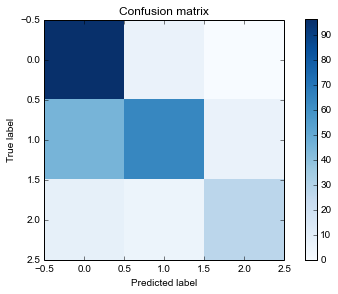

In [6]:
%matplotlib inline

from sklearn import svm, metrics
import matplotlib.pyplot as plt

svc = svm.SVC( gamma=0.001, C=100. )
svc.fit( X_train, Y_train )
Y_pred = svc.predict( X_test )
s = svc.score( X_test, Y_test )
print "Score:", s

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = metrics.confusion_matrix( Y_test, Y_pred )
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)


